In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
spoti_data = pd.read_csv('../spotify data.csv')

In [5]:
spoti_data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928


In [6]:
spoti_data.shape

(169909, 19)

In [7]:
to_clust = spoti_data.drop(['artists', 'explicit', 'id', 'name', 'release_date', 'year'], axis = 1)

In [8]:
to_clust = to_clust.set_index(spoti_data['id'])
to_clust.to_csv('datadata.csv')


In [9]:
to_clust

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
id,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.9950,0.708,158648,0.1950,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790
6KuQTIu1KoTTkLXKrwlLPV,0.9940,0.379,282133,0.0135,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767
6L63VW0PibdM1HDSBoqnoM,0.6040,0.749,104300,0.2200,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800
6M94FkXd15sOAOQYRnWPN8,0.9950,0.781,180760,0.1300,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200
6N6tiFZ9vLTSOIxkj8qKrd,0.9900,0.210,687733,0.2040,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,0.1730,0.875,163800,0.4430,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060
1ehhGlTvjtHo2e4xJFB0SZ,0.0167,0.719,167468,0.3850,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700
52eycxprLhK3lPcRLbQiVk,0.5380,0.514,180700,0.5390,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530


In [10]:
stand_toclust = StandardScaler().fit_transform(to_clust)

In [11]:
pd.DataFrame(stand_toclust,columns=)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.332319,0.968662,-0.599713,-1.097999,1.296562,1.365333,-0.314998,-0.186652,0.641344,-1.462135,-0.289840,0.049500,0.940924
1,1.329664,-0.907636,0.418119,-1.776785,2.389253,0.796383,-0.737519,-3.014729,0.641344,-1.462135,-0.319186,-1.073199,-1.735454
2,0.294154,1.202486,-1.047680,-1.004503,-0.523513,-0.057043,-0.495997,-1.509457,-1.559227,-1.462135,5.568626,-0.317996,1.325822
3,1.332319,1.384983,-0.417454,-1.341091,2.343994,-1.194943,-0.541247,-0.593587,-1.559227,-1.462135,-0.009722,-0.291114,0.716082
4,1.319044,-1.871449,3.761300,-1.064341,2.411883,1.649808,-0.614778,-0.963288,0.641344,-1.415802,-0.344530,-1.783425,-1.763655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,-0.850217,1.921069,-0.557248,-0.170512,-0.523408,-1.194943,-0.665119,0.689865,0.641344,2.012894,0.326419,-0.551180,-0.861621
169905,-1.265218,1.031395,-0.527014,-0.387425,-0.422326,0.796383,-0.541247,0.081756,0.641344,1.503223,-0.358536,0.359685,-0.998812
169906,0.118914,-0.137727,-0.417948,0.188515,-0.515980,0.511907,-0.558216,0.359693,0.641344,1.781226,0.072979,0.219742,-1.444685
169907,-1.119981,0.615074,-0.528333,1.018766,-0.523513,-1.194943,0.086595,1.555264,0.641344,1.781226,-0.370541,0.422041,-0.229015


In [12]:
standard_data = pd.DataFrame(stand_toclust, columns=to_clust.columns, index=spoti_data['id'])
standard_data.to_csv('data_towork.csv')

In [13]:
standard_data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
id,,,,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,1.332319,0.968662,-0.599713,-1.097999,1.296562,1.365333,-0.314998,-0.186652,0.641344,-1.462135,-0.289840,0.049500,0.940924
6KuQTIu1KoTTkLXKrwlLPV,1.329664,-0.907636,0.418119,-1.776785,2.389253,0.796383,-0.737519,-3.014729,0.641344,-1.462135,-0.319186,-1.073199,-1.735454
6L63VW0PibdM1HDSBoqnoM,0.294154,1.202486,-1.047680,-1.004503,-0.523513,-0.057043,-0.495997,-1.509457,-1.559227,-1.462135,5.568626,-0.317996,1.325822
6M94FkXd15sOAOQYRnWPN8,1.332319,1.384983,-0.417454,-1.341091,2.343994,-1.194943,-0.541247,-0.593587,-1.559227,-1.462135,-0.009722,-0.291114,0.716082
6N6tiFZ9vLTSOIxkj8qKrd,1.319044,-1.871449,3.761300,-1.064341,2.411883,1.649808,-0.614778,-0.963288,0.641344,-1.415802,-0.344530,-1.783425,-1.763655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,-0.850217,1.921069,-0.557248,-0.170512,-0.523408,-1.194943,-0.665119,0.689865,0.641344,2.012894,0.326419,-0.551180,-0.861621
1ehhGlTvjtHo2e4xJFB0SZ,-1.265218,1.031395,-0.527014,-0.387425,-0.422326,0.796383,-0.541247,0.081756,0.641344,1.503223,-0.358536,0.359685,-0.998812
52eycxprLhK3lPcRLbQiVk,0.118914,-0.137727,-0.417948,0.188515,-0.515980,0.511907,-0.558216,0.359693,0.641344,1.781226,0.072979,0.219742,-1.444685


In [14]:
kmeans = KMeans(n_clusters=6, random_state=39)
kmeans.fit(standard_data)

KMeans(n_clusters=6, random_state=39)

In [15]:
clusters = kmeans.predict(stand_toclust)
pd.Series(clusters).value_counts().sort_index()

0    28369
1    57165
2    46146
3     4570
4    23271
5    10388
dtype: int64

In [16]:
pd.DataFrame({'cluster':clusters})

,cluster
0,2
1,4
2,3
3,4
4,4
...,...
169904,1
169905,1
169906,1
169907,1


In [20]:
kmeans = KMeans(n_clusters=15,
                init="random",
                n_init=4,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(stand_toclust)
print(kmeans.inertia_)

1108735.9840923129


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

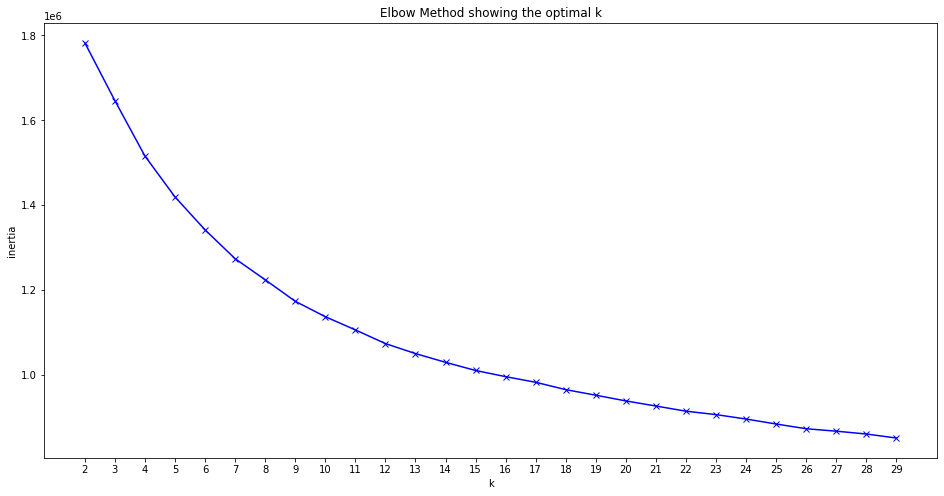

In [25]:
K = range(2, 30)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(stand_toclust)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

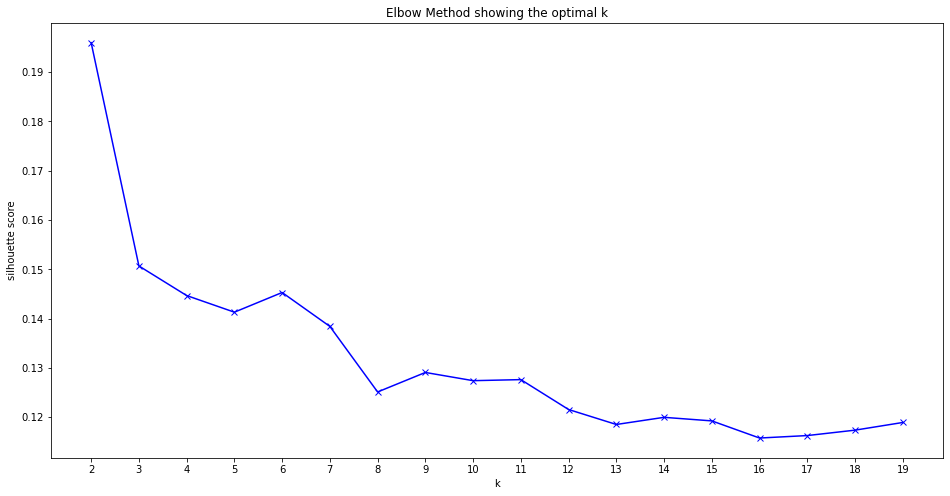

In [24]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(stand_toclust)
    silhouette.append(silhouette_score(stand_toclust, kmeans.predict(stand_toclust)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [17]:
them_dataset = pd.DataFrame(stand_toclust, columns=to_clust.columns)

In [18]:
them_dataset[['title','song_id', 'artist']] = spoti_data[['name','id','artists']]

In [19]:
them_dataset

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,title,song_id,artist
0,1.332319,0.968662,-0.599713,-1.097999,1.296562,1.365333,-0.314998,-0.186652,0.641344,-1.462135,-0.289840,0.049500,0.940924,Singende Bataillone 1. Teil,6KbQ3uYMLKb5jDxLF7wYDD,['Carl Woitschach']
1,1.329664,-0.907636,0.418119,-1.776785,2.389253,0.796383,-0.737519,-3.014729,0.641344,-1.462135,-0.319186,-1.073199,-1.735454,"Fantasiestücke, Op. 111: Più tosto lento",6KuQTIu1KoTTkLXKrwlLPV,"['Robert Schumann', 'Vladimir Horowitz']"
2,0.294154,1.202486,-1.047680,-1.004503,-0.523513,-0.057043,-0.495997,-1.509457,-1.559227,-1.462135,5.568626,-0.317996,1.325822,Chapter 1.18 - Zamek kaniowski,6L63VW0PibdM1HDSBoqnoM,['Seweryn Goszczyński']
3,1.332319,1.384983,-0.417454,-1.341091,2.343994,-1.194943,-0.541247,-0.593587,-1.559227,-1.462135,-0.009722,-0.291114,0.716082,Bebamos Juntos - Instrumental (Remasterizado),6M94FkXd15sOAOQYRnWPN8,['Francisco Canaro']
4,1.319044,-1.871449,3.761300,-1.064341,2.411883,1.649808,-0.614778,-0.963288,0.641344,-1.415802,-0.344530,-1.783425,-1.763655,"Polonaise-Fantaisie in A-Flat Major, Op. 61",6N6tiFZ9vLTSOIxkj8qKrd,"['Frédéric Chopin', 'Vladimir Horowitz']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,-0.850217,1.921069,-0.557248,-0.170512,-0.523408,-1.194943,-0.665119,0.689865,0.641344,2.012894,0.326419,-0.551180,-0.861621,Skechers (feat. Tyga) - Remix,4KppkflX7I3vJQk7urOJaS,"['DripReport', 'Tyga']"
169905,-1.265218,1.031395,-0.527014,-0.387425,-0.422326,0.796383,-0.541247,0.081756,0.641344,1.503223,-0.358536,0.359685,-0.998812,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,"['Leon Bridges', 'Terrace Martin']"
169906,0.118914,-0.137727,-0.417948,0.188515,-0.515980,0.511907,-0.558216,0.359693,0.641344,1.781226,0.072979,0.219742,-1.444685,How Would I Know,52eycxprLhK3lPcRLbQiVk,"['Kygo', 'Oh Wonder']"
169907,-1.119981,0.615074,-0.528333,1.018766,-0.523513,-1.194943,0.086595,1.555264,0.641344,1.781226,-0.370541,0.422041,-0.229015,I Found You,3wYOGJYD31sLRmBgCvWxa4,"['Cash Cash', 'Andy Grammer']"


In [137]:
them_dataset[them_dataset['song_id']=='1ehhGlTvjtHo2e4xJFB0SZ']

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,cluster,title,song_id,artist
169905,-1.265218,1.031395,-0.527014,-0.387425,-0.422326,0.796383,-0.541247,0.081756,0.641344,1.503223,-0.358536,0.359685,-0.998812,6,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,"['Leon Bridges', 'Terrace Martin']"


In [20]:
them_dataset.to_csv('them_dataset.csv', index=False)

In [ ]:
0KVEBQA98JvkmB5ZydQ13k